<a href="https://colab.research.google.com/github/tuhinbiswas24/World-Wide-Unicorn-Startups-Data-Analysis/blob/main/World_Wide_Unicorn_Startups_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('World_Wide_Unicorn_Startups.csv')

In [3]:
df.head()

,Company,Valuation,Date,Country,City,Industry,Investors,year,month,day
0,Bytedance,140.0,4/7/2017,China,Beijing,Artificial intelligence,"0 Sequoia Capital China, SIG Asia Investm...",2017,7,4
1,SpaceX,100.3,12/1/2012,United States,Hawthorne,Other,"0 Sequoia Capital China, SIG Asia Investm...",2012,1,12
2,Stripe,95.0,1/23/2014,United States,San Francisco,Fintech,"0 Sequoia Capital China, SIG Asia Investm...",2014,23,1
3,Klarna,45.6,12/12/2011,Sweden,Stockholm,Fintech,"0 Sequoia Capital China, SIG Asia Investm...",2011,12,12
4,Canva,40.0,1/8/2018,Australia,Surry Hills,Internet software & services,"0 Sequoia Capital China, SIG Asia Investm...",2018,8,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 936 entries, 0 to 935
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Company    936 non-null    object 
 1   Valuation  936 non-null    float64
 2   Date       936 non-null    object 
 3   Country    936 non-null    object 
 4   City       921 non-null    object 
 5   Industry   936 non-null    object 
 6   Investors  936 non-null    object 
 7   year       936 non-null    int64  
 8   month      936 non-null    int64  
 9   day        936 non-null    int64  
dtypes: float64(1), int64(3), object(6)
memory usage: 73.2+ KB


In [5]:
df.describe()

,Valuation,year,month,day
count,936.000000,936.000000,936.000000,936.000000
mean,3.281154,2019.543803,15.694444,6.740385
std,7.473179,2.020273,8.642799,3.248350
min,1.000000,2007.000000,1.000000,1.000000
25%,1.050000,2018.000000,8.000000,4.000000
50%,1.600000,2021.000000,16.000000,7.000000
75%,3.000000,2021.000000,23.000000,10.000000
max,140.000000,2021.000000,31.000000,12.000000


In [6]:
df.isnull().sum()

Company       0
Valuation     0
Date          0
Country       0
City         15
Industry      0
Investors     0
year          0
month         0
day           0
dtype: int64

In [7]:
df.dropna(inplace=True)

# **Correcting spelling mistakes**

In [8]:
df["Industry"]=df["Industry"].apply(lambda x: "Fintech" if x=="Finttech" else x)
df["Industry"]=df["Industry"].apply(lambda x: "Artificial Intelligence" if x=="Artificial intelligence" else x)

# **Analysis of industries and the total number of startups they are having**

In [9]:
df.groupby('Industry').size().sort_values(ascending=False)

Industry
Fintech                                185
Internet software & services           166
E-commerce & direct-to-consumer         98
Artificial Intelligence                 71
Health                                  63
Other                                   51
Supply chain, logistics, & delivery     50
Cybersecurity                           41
Data management & analytics             36
Mobile & telecommunications             36
Hardware                                32
Auto & transportation                   29
Edtech                                  27
Consumer & retail                       23
Travel                                  13
dtype: int64

Text(0.5, 1.0, 'Industry with least to most startups')

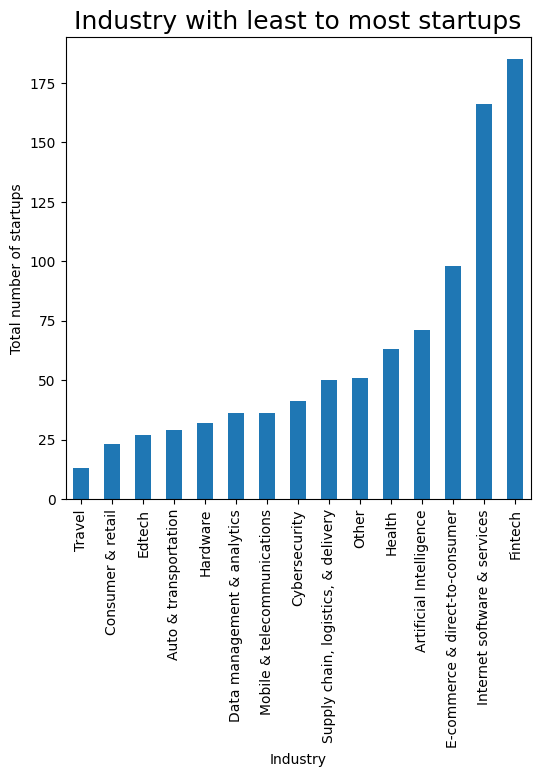

In [10]:
df.groupby('Industry').size().sort_values().plot(kind='bar', figsize=(6,6), ylabel='Total number of startups')
plt.title("Industry with least to most startups", fontdict={"fontsize":18})

In [11]:
# From the above, we can see that Fintech industry is having the maximum number of startups

<Axes: >

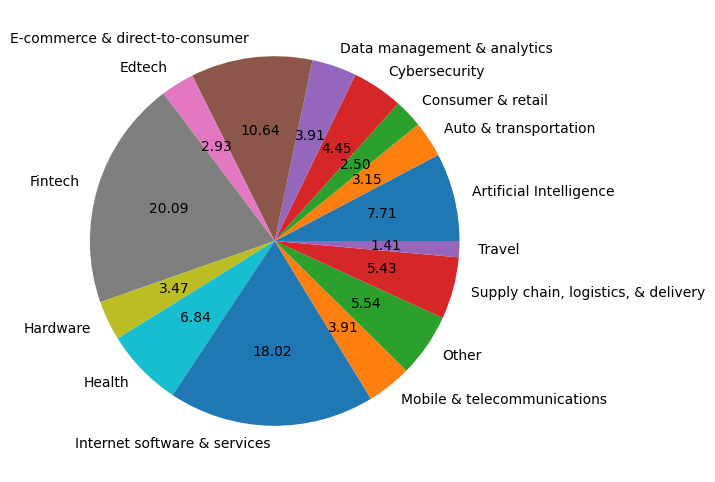

In [12]:
df.groupby('Industry').size().plot(kind='pie', figsize=(6,6), autopct="%0.2f")

# **Analysis of countries and the total number of startups they are having**

In [13]:
df.groupby('Country').size().sort_values(ascending=False)

Country
United States           477
China                   169
India                    51
United Kingdom           37
Germany                  23
Israel                   21
France                   19
Brazil                   15
Canada                   15
South Korea              11
Australia                 6
Japan                     6
Netherlands               5
Mexico                    5
Sweden                    4
Indonesia                 4
Spain                     4
Switzerland               4
United Arab Emirates      3
Norway                    3
Hong Kong                 3
Ireland                   3
Denmark                   2
Philippines               2
Austria                   2
South Africa              2
Belgium                   2
Turkey                    2
Thailand                  2
Colombia                  2
Finland                   2
Senegal                   1
United States,            1
Argentina                 1
Santa Clara               1
Nigeria     

In [14]:
#The top 5 Countries on the basis of the total number of startups they have

df.groupby('Country').size().sort_values(ascending=False).head()

Country
United States     477
China             169
India              51
United Kingdom     37
Germany            23
dtype: int64

In [15]:
df1=df.groupby('Country').size().sort_values(ascending=False).head()

Text(0.5, 1.0, 'Top 5 Countries from most to least number of startups')

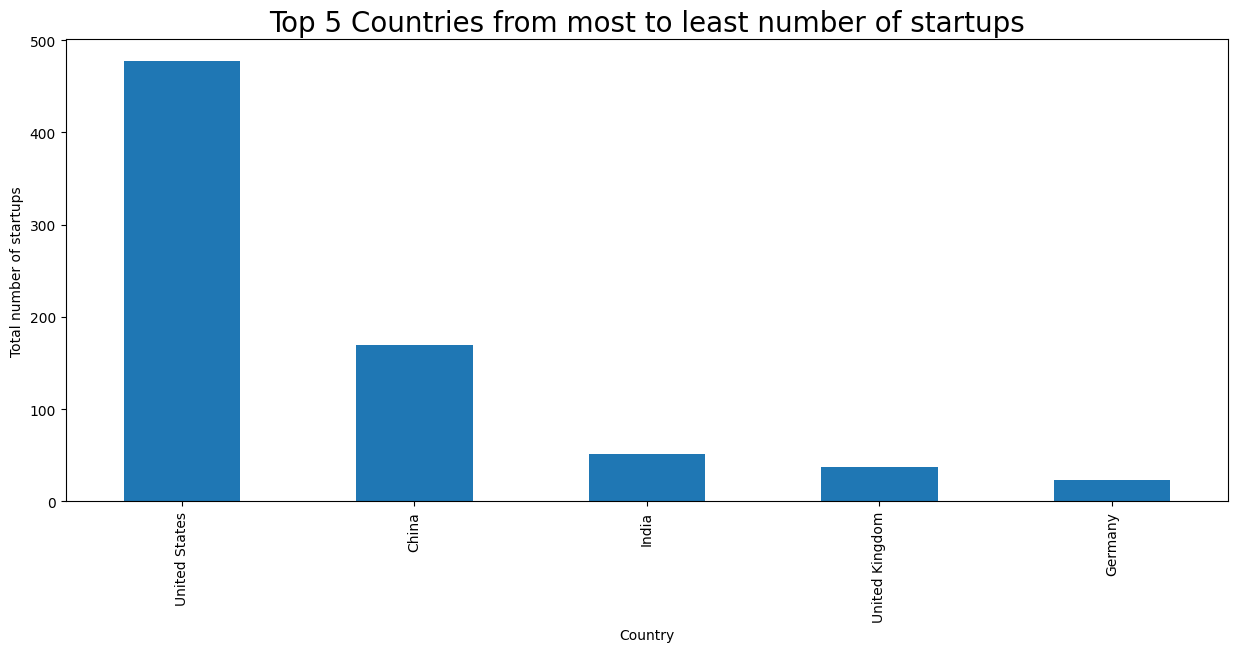

In [16]:
df1.plot(kind='bar', figsize=(15,6), ylabel='Total number of startups')
plt.title("Top 5 Countries from most to least number of startups", fontdict={"fontsize":20})

# **Analysis of industries and their total valuation**

In [17]:
df.groupby('Industry').sum()['Valuation'].sort_values(ascending=False)

<ipython-input-17-445048258ef3>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('Industry').sum()['Valuation'].sort_values(ascending=False)


Industry
Fintech                                714.03
Internet software & services           482.76
Artificial Intelligence                309.54
E-commerce & direct-to-consumer        287.00
Other                                  245.46
Health                                 166.26
Supply chain, logistics, & delivery    145.29
Data management & analytics            121.70
Cybersecurity                          107.54
Hardware                                98.59
Auto & transportation                   89.30
Edtech                                  85.37
Mobile & telecommunications             75.59
Consumer & retail                       64.13
Travel                                  35.60
Name: Valuation, dtype: float64

<ipython-input-18-79ca795132e7>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('Industry').sum()['Valuation'].sort_values(ascending=False).plot(kind='bar', figsize=(15,6), ylabel='Valuation')


Text(0.5, 1.0, 'Industry with highest to lowest valuation')

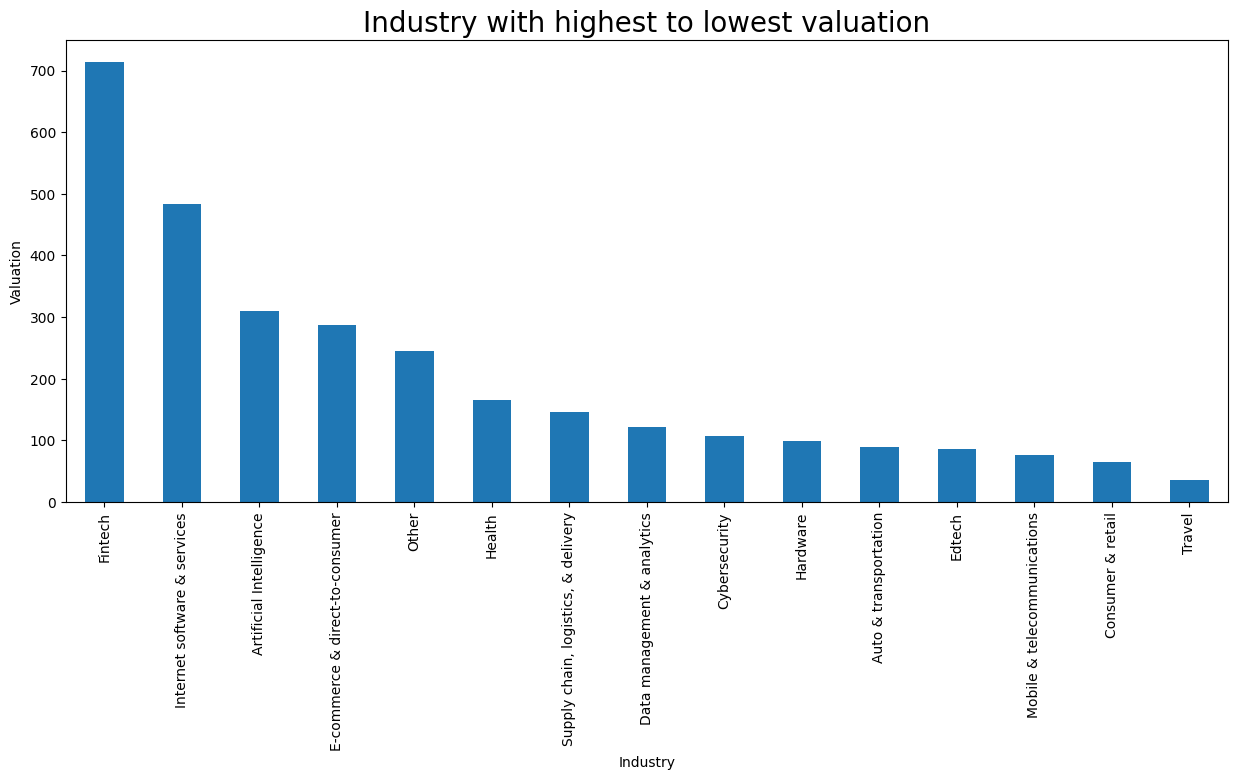

In [18]:
df.groupby('Industry').sum()['Valuation'].sort_values(ascending=False).plot(kind='bar', figsize=(15,6), ylabel='Valuation')
plt.title("Industry with highest to lowest valuation", fontdict={"fontsize":20})

In [19]:
# From the above, we can see that Fintech industry is having the highest total valuation.

# **Analysis of year and the total number of startups started in that year**

In [20]:
df1=df.sort_values(by='year')
df1.groupby('year').size().sort_values()

year
2007      1
2010      1
2011      2
2013      3
2012      4
2014     13
2016     22
2015     37
2017     45
2018    107
2019    109
2020    109
2021    468
dtype: int64

<Axes: xlabel='year', ylabel='count'>

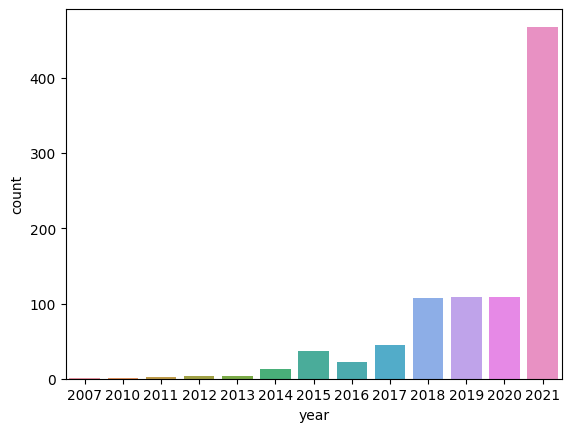

In [21]:
sns.countplot(x='year',data=df1)

In [22]:
# From the above, we can see that most number of startups have been found in the year 2021.

# **Oldest company**

In [23]:
df_new=df
df_new['Date']=pd.to_datetime(df_new['Date'])
df_new.sort_values(by='Date',inplace=True)
df_new.head()

,Company,Valuation,Date,Country,City,Industry,Investors,year,month,day
557,Veepee,1.38,2007-07-20,France,La Plaine Saint-Denis,E-commerce & direct-to-consumer,"0 Sequoia Capital China, SIG Asia Investm...",2007,20,7
224,VANCL,3.00,2010-12-14,China,Beijing,E-commerce & direct-to-consumer,"0 Sequoia Capital China, SIG Asia Investm...",2010,14,12
99,Vice Media,5.70,2011-04-02,United States,Brooklyn,Internet software & services,"0 Sequoia Capital China, SIG Asia Investm...",2011,2,4
3,Klarna,45.60,2011-12-12,Sweden,Stockholm,Fintech,"0 Sequoia Capital China, SIG Asia Investm...",2011,12,12
349,Trendy Group International,2.00,2012-02-13,Hong Kong,Kowloon,Consumer & retail,"0 Sequoia Capital China, SIG Asia Investm...",2012,13,2


In [24]:
# We can see from the above that 'Veepee' is the oldest company.

# **Newest company**

In [25]:
df_new.sort_values(by='Date',inplace=True,ascending=False)
df_new.head()

,Company,Valuation,Date,Country,City,Industry,Investors,year,month,day
935,Pet Circle,1.00,2021-12-07,Australia,Alexandria,E-commerce & direct-to-consumer,"0 Sequoia Capital China, SIG Asia Investm...",2021,7,12
597,Incode Technologies,1.25,2021-12-07,United States,San Francisco,Cybersecurity,"0 Sequoia Capital China, SIG Asia Investm...",2021,7,12
932,Anyscale,1.00,2021-12-07,United States,Berkeley,Artificial Intelligence,"0 Sequoia Capital China, SIG Asia Investm...",2021,7,12
639,AgentSync,1.20,2021-12-07,United States,Denver,Fintech,"0 Sequoia Capital China, SIG Asia Investm...",2021,7,12
640,Pristyn Care,1.20,2021-12-07,India,Gurugram,Health,"0 Sequoia Capital China, SIG Asia Investm...",2021,7,12


In [26]:
# From the above, we can see that there are total of 5 companies which are newest and have started at the same date.

# **Company with highest valuation**

In [27]:
df['Company'][df['Valuation']==df['Valuation'].max()]

0    Bytedance
Name: Company, dtype: object

In [28]:
# 'Bytedance' is the startup company with the highest valuation.

# **Top 10 Companies on the basis of their valuation**

In [29]:
df.nlargest(10,['Valuation'])

,Company,Valuation,Date,Country,City,Industry,Investors,year,month,day
0,Bytedance,140.0,2017-04-07,China,Beijing,Artificial Intelligence,"0 Sequoia Capital China, SIG Asia Investm...",2017,7,4
1,SpaceX,100.3,2012-12-01,United States,Hawthorne,Other,"0 Sequoia Capital China, SIG Asia Investm...",2012,1,12
2,Stripe,95.0,2014-01-23,United States,San Francisco,Fintech,"0 Sequoia Capital China, SIG Asia Investm...",2014,23,1
3,Klarna,45.6,2011-12-12,Sweden,Stockholm,Fintech,"0 Sequoia Capital China, SIG Asia Investm...",2011,12,12
4,Canva,40.0,2018-01-08,Australia,Surry Hills,Internet software & services,"0 Sequoia Capital China, SIG Asia Investm...",2018,8,1
5,Instacart,39.0,2014-12-30,United States,San Francisco,"Supply chain, logistics, & delivery","0 Sequoia Capital China, SIG Asia Investm...",2014,30,12
6,Databricks,38.0,2019-02-05,United States,San Francisco,Data management & analytics,"0 Sequoia Capital China, SIG Asia Investm...",2019,5,2
7,Revolut,33.0,2018-04-26,United Kingdom,London,Fintech,"0 Sequoia Capital China, SIG Asia Investm...",2018,26,4
8,Nubank,30.0,2018-03-01,Brazil,Sao Paulo,Fintech,"0 Sequoia Capital China, SIG Asia Investm...",2018,1,3
9,Epic Games,28.7,2018-10-26,United States,Cary,Other,"0 Sequoia Capital China, SIG Asia Investm...",2018,26,10
